# Online Monitoring

## 1 Real-time Data Server

### 1.1 Introduction to Redis

Redis is an open source (BSD licensed), in-memory data structure store, used as database, cache and message broker. It supports data structures such as strings, hashes, lists, sets, sorted sets with range queries, bitmaps, hyperloglogs and geospatial indexes with radius queries. Redis has built-in replication, Lua scripting, LRU eviction, transactions and different levels of on-disk persistence, and provides high availability via Redis Sentinel and automatic partitioning with Redis Cluster.

Redis is written in ANSI C and works in most POSIX systems like Linux, *BSD, OS X without external dependencies. Linux and OS X are the two operating systems where Redis is developed and more tested, and we recommend using Linux for deploying. Redis may work in Solaris-derived systems like SmartOS, but the support is best effort. There is no official support for Windows builds, but Microsoft develops and maintains a Win-64 port of Redis.


### 　Install On Windows

https://github.com/MSOpenTech/redis
    
Running Redis as a Service
If you installed Redis using the MSI package, then Redis was already installed as a Windows service. Nothing further to do. If you would like to change its settings, you can update the redis.windows.conf file and then restart the Redis service (Run -> services.msc -> Redis -> Restart). 
During installation of the MSI you can either use the installer’s user interface to update the port that Redis listens at and the firewall exception or run it silently without a UI. The following examples show how to install from the command line:

default install (port 6379 and firewall exception ON):
```
msiexec /i Redis-Windows-x64.msi 
```
set port and turn OFF firewall exception:
```   
msiexec /i Redis-Windows-x64.msi PORT=1234 ADD_FIREWALL_RULE=""
```
set port and turn ON firewall exception:
``` 
msiexec /i Redis-Windows-x64.msi PORT=1234 ADD_FIREWALL_RULE =1
```
install with no user interface:
```   
msiexec /quiet /i Redis-Windows-x64.msi
```

### 1.2 Basic Operations

In [ ]:
set foo tar

In [ ]:
get foo

## 2 Real-time Data Services with Python




### 2.1 Python API



``` 
pip install redis
pip install hiredis
```


### 2.2 Real-time Data Service

<ol>
<li>setup Tag in  Data Service
<li>Send data to Data Service
<li>Get data from Data Service and analyze
</ol>

#### 2.2.1 setup Tag in Data Service

In [25]:
# -*- coding: utf-8 -*-
import redis

conn = redis.Redis('localhost')

def TagDefToRedisHashKey(tagdeflist):
    pipe = conn.pipeline()
    for element in tagdeflist:
        pipe.hmset(
            element['id'], {'desc': element['desc'], 'value': "-10000", 'ts': ""})
    pipe.execute()


def TagDefFromRedisHash(tagdeflist):
    taglist = []
    for element in tagdeflist:
        htag = conn.hgetall(element['id'])
        taglist.append(htag)
    return taglist


In [26]:
unittagdeflist=[]
unittagdeflist.append({'id':"CSDC.DCS2AI.2JZA2226",'desc':"二号机组高压缸入口压力"})
unittagdeflist.append({'id':"CSDC.DCS2AI.2JZA2408",'desc':"二号机组高压缸入口温度"})
unittagdeflist.append({'id':"CSDC.DCS2AI.2JZA2230",'desc':"二号机组高压缸出口压力"})
unittagdeflist.append({'id':"CSDC.DCS2AI.2JZA2459",'desc':"二号机组高压缸出口温度"})
unittagdeflist.append({'id':"CSDC.DCS2AI.2JZA2264",'desc':"大气压力"})

TagDefToRedisHashKey(unittagdeflist)

taglist=TagDefFromRedisHash(unittagdeflist)
print(taglist[0])

{b'ts': b'', b'value': b'-10000', b'desc': b'\xe4\xba\x8c\xe5\x8f\xb7\xe6\x9c\xba\xe7\xbb\x84\xe9\xab\x98\xe5\x8e\x8b\xe7\xbc\xb8\xe5\x85\xa5\xe5\x8f\xa3\xe5\x8e\x8b\xe5\x8a\x9b'}


### 2.2.2 Send Data to Redis



In [27]:
# -*- coding: utf-8 -*-
from datetime import *

def SendToRedisHash(tagvaluelist):
    pipe = conn.pipeline()

    curtime = datetime.now()

    for element in tagvaluelist:
        pipe.hmset(element['id'], {'value': element['value'], 'ts': curtime})
    pipe.execute()


In [28]:
unittagvaluelist=[]
unittagvaluelist.append({'id':"CSDC.DCS2AI.2JZA1030",'value':16.38525})
unittagvaluelist.append({'id':"CSDC.DCS2AI.2JZA2408",'value':538.37})
unittagvaluelist.append({'id':"CSDC.DCS2AI.2JZA2230",'value':3.035039})
unittagvaluelist.append({'id':"CSDC.DCS2AI.2JZA2459",'value':313.2931})
unittagvaluelist.append({'id':"CSDC.DCS2AI.2JZA2264",'value':100.5281})
SendToRedisHash(unittagvaluelist)

print(unittagvaluelist[0])
print(conn.hmget(unittagvaluelist[0]['id'], 'value', 'ts'))
 

{'value': 16.38525, 'id': 'CSDC.DCS2AI.2JZA1030'}
[b'16.38525', b'2015-12-03 21:41:17.984464']


### 2.2.3 Get Real-time Data from Redis

In [29]:
# -*- coding: utf-8 -*-
def tagvalue_redis(taglist):
        #        for i in range(self.tagcount):
        #            self.taglist[i]['value']= conn.hget(self.taglist[i]['name'],'value').decode()
        tagcount=len(taglist)
        pipe = conn.pipeline()
        for i in range(tagcount):
            pipe.hmget(taglist[i]['id'], 'value', 'ts')
        tagvaluelist = pipe.execute()

        for i in range(tagcount):
            taglist[i]['value'] = tagvaluelist[i][0].decode()
            taglist[i]['ts'] = tagvaluelist[i][1].decode()


In [32]:
unittaglist=[]
unittaglist.append({'id':"CSDC.DCS2AI.2JZA1030"})
unittaglist.append({'id':"CSDC.DCS2AI.2JZA2408"})
unittaglist.append({'id':"CSDC.DCS2AI.2JZA2230"})
unittaglist.append({'id':"CSDC.DCS2AI.2JZA2459"})
unittaglist.append({'id':"CSDC.DCS2AI.2JZA2264"})

tagvalue_redis(unittaglist)

print(unittaglist[0])
        

{'ts': '2015-12-03 21:41:17.984464', 'value': '16.38525', 'id': 'CSDC.DCS2AI.2JZA1030'}


### 2.2.4  Online moitoring internal efficiency


In [33]:
# -*- coding: utf-8 -*-
from seuif97 import *

def CylinderEff(cylinder):
    """simple function  for cylinde using 'dict' """

    cylinder['inlet']['h'] = pt2h(cylinder['inlet']['p'], cylinder['inlet']['t'])
    cylinder['inlet']['s'] = pt2s(cylinder['inlet']['p'], cylinder['inlet']['t'])

    cylinder['outlet']['h'] = pt2h(cylinder['outlet']['p'], cylinder['outlet']['t'])
    cylinder['outlet']['s'] = pt2s(cylinder['outlet']['p'], cylinder['outlet']['t'])

    # h2s is the specific enthalpy at state 2 for the isentropic turbine
    h2s = ps2h(cylinder['outlet']['p'], cylinder['inlet']['s'])
    
    cylinder['h2s'] = h2s
     
    hds = cylinder['inlet']['h'] - h2s  # isentropic specific enthalpy drop
    hd = cylinder['inlet']['h'] - cylinder['outlet']['h']  # specific enthalpy drop

    cylinder['eff'] = 100 * hd / hds

    return cylinder


In [34]:
hp = {'inlet':{}, 'outlet':{}, 'h2s':None,'eff':None}

minlet = {'p':None, 't': None, 'h': None, 's':None}
moutlet = {'p': None, 't': None, 'h': None, 's': None}

pam=float(unittaglist[4]['value'])/1000

minlet['p']=float(unittaglist[0]['value'])+pam
minlet['t']=float(unittaglist[1]['value'])
moutlet['p']=float(unittaglist[2]['value'])+pam
moutlet['t']=float(unittaglist[3]['value'])

hp['inlet'] = dict(minlet)
hp['outlet'] = dict(moutlet)
hp = CylinderEff(hp)

print('The internal efficiency =', hp['eff'], '%')

The internal efficiency = 81.71506348039361 %


In [35]:
# -*- coding: utf-8 -*-
"""
    visual steam expansion line in cylinder
"""

import matplotlib.pyplot as plt
import numpy as np
from seuif97 import *

def CylinderPlot(cylinder):
    # 4条线：p1、p2 等压，等熵焓降线、膨胀线

    p1 = cylinder['inlet']['p']
    t1 = cylinder['inlet']['t']
    s1 = cylinder['inlet']['s']
    h1 = cylinder['inlet']['h']
    
    p2 = cylinder['outlet']['p']
    t2 = cylinder['outlet']['t']
    s2 = cylinder['outlet']['s']
    h2 = cylinder['outlet']['h']
    
    eff = cylinder['eff']
    
    hs = cylinder['h2s']
    
    samp = 0.01
     
    smp1 = s1 - samp
    hsmp1 = ps2h(p1, smp1)
    sap1 = s1 + samp
    hsap1 = ps2h(p1, sap1)

    smt1 = s1 - samp
    hsmt1 = ps2h(p1, smp1)
    sat1 = s1 + samp
    hsat1 = ts2h(t1, sap1)
    
    # 1 p1等压
    point_p1_h = np.zeros(shape=3)
    point_p1_h[0] = hsmp1
    point_p1_h[1] = h1
    point_p1_h[2] = hsap1
    point_p1_s = np.zeros(shape=3)
    point_p1_s[0] = smp1
    point_p1_s[1] = s1
    point_p1_s[2] = sap1

    # 2 p2 等压
    smp2 = s1 - samp  # 等熵焓降点延伸
    hsmp2 = ps2h(p2, smp2)
    sap2 = s2 + samp
    hsap2 = ps2h(p2, sap2)

    smt2 = s2 - samp
    hsmt2 = ps2h(p1, smp1)
    sat2 = s2 + samp
    hsat2 = ts2h(t2, sap1)

    point_p2_h = np.zeros(shape=3)
    point_p2_h[0] = hsmp2
    point_p2_h[1] = h2
    point_p2_h[2] = hsap2

    point_p2_s = np.zeros(shape=3)
    point_p2_s[0] = smp2
    point_p2_s[1] = s2
    point_p2_s[2] = sap2

    # 3 等熵焓降
    point_is_h = np.zeros(shape=2)
    point_is_h[0] = h1
    point_is_h[1] = hs
    point_is_s = np.zeros(shape=2)
    point_is_s[0] = s1
    point_is_s[1] = s1

    # 4 HP Expansion Line
    point_hp_h = np.zeros(shape=2)
    point_hp_h[0] = h1
    point_hp_h[1] = h2
    point_hp_s = np.zeros(shape=2)
    point_hp_s[0] = s1
    point_hp_s[1] = s2

    plt.plot(point_p1_s, point_p1_h, 'bs-', label='iP')

    plt.plot(point_p2_s, point_p2_h, 'bs-', label=r'$\frac{1}{2}\pi$')
    plt.plot(point_is_s, point_is_h, 'rs-', label='is')
    plt.plot(point_hp_s, point_hp_h, 'rs-', label='HP Expansion Line"')
    plt.minorticks_on()
    
    _title = 'The isentropic efficiency = ' + \
    r'$\frac{h1-h2}{h1-h2s}$' + '=' + '{:.2f}'.format(eff) + '%'
    plt.legend(loc="center left", bbox_to_anchor=[0.5, 0.5],
           ncol=2, shadow=True, title=_title)

    # annotate some interesting points using the annotate command
    plt.annotate('(P1,T1)',
             xy=(s1, h1), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

    plt.annotate('(P2,T2)',
             xy=(s2, h2), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=12,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

    plt.xlabel('s(kJ/(kg.K))')
    plt.ylabel('h(kJ/kg)')
    plt.show()

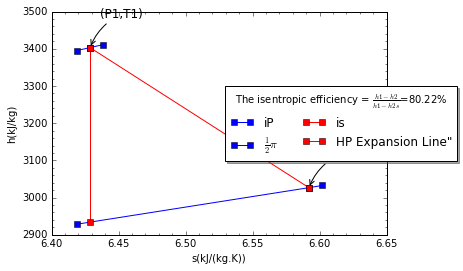

In [20]:
# -*- coding: utf-8 -*-
%matplotlib inline

hp = {'inlet':{}, 'outlet':{}, 'eff':None}

minlet['p']=float(unittaglist[0]['value'])
minlet['t']=float(unittaglist[1]['value'])
moutlet['p']=float(unittaglist[2]['value'])
moutlet['t']=float(unittaglist[3]['value'])

hp['inlet'] = dict(minlet)
hp['outlet'] = dict(moutlet)

hp = CylinderEff(hp)
CylinderPlot(hp)

## Reference

<ol>
<li>The Redis Documentation. http://redis.io/documentation
<li>JOSIAH L. CARLSON. Redis in Action. Manning Publications Co. 2013 
</ol>